In [1]:
pip install pandas numpy scipy


Note: you may need to restart the kernel to use updated packages.


In [9]:
#Write a python program to identify outliers in the data set using IQR,Z-scores?
import pandas as pd
import numpy as np
from scipy import stats

# Sample dataset
data = {
    'values': [10, 12, 12, 13, 12, 13, 12, 14, 15, 19, 22, 30, 100]  # Notice the outlier 100
}
df = pd.DataFrame(data)

# Function to identify outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Function to identify outliers using Z-scores
def detect_outliers_zscore(df, column):
    z_scores = np.abs(stats.zscore(df[column]))
    threshold = 3  # Common threshold for Z-scores
    outliers = df[z_scores > threshold]
    return outliers

# Identifying outliers
iqr_outliers = detect_outliers_iqr(df, 'values')
zscore_outliers = detect_outliers_zscore(df, 'values')

print("Outliers using IQR method:")
print(iqr_outliers)

print("\nOutliers using Z-score method:")
print(zscore_outliers)


Outliers using IQR method:
    values
11      30
12     100

Outliers using Z-score method:
    values
12     100


In [11]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


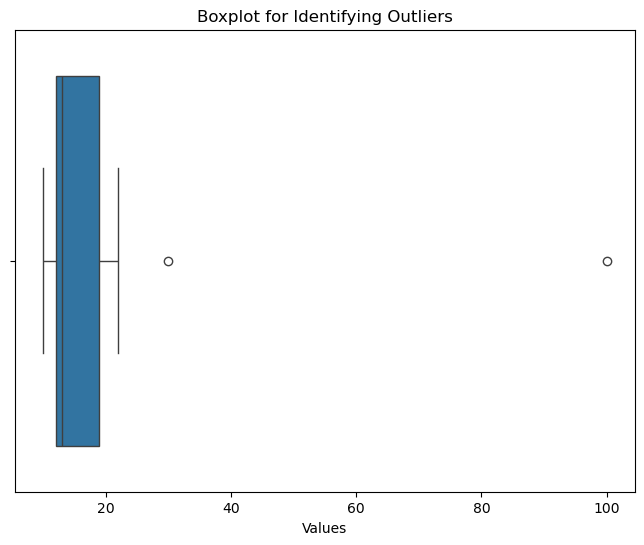

In [13]:
#Write a python program for Boxplot visualization to identify outliers visually
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
data = {
    'values': [10, 12, 12, 13, 12, 13, 12, 14, 15, 19, 22, 30, 100]  # Notice the outlier 100
}
df = pd.DataFrame(data)

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['values'])

# Adding title and labels
plt.title('Boxplot for Identifying Outliers')
plt.xlabel('Values')

# Display the plot
plt.show()


In [15]:
pip install pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


Accuracy with outliers: 0.6
Accuracy without outliers: 0.75


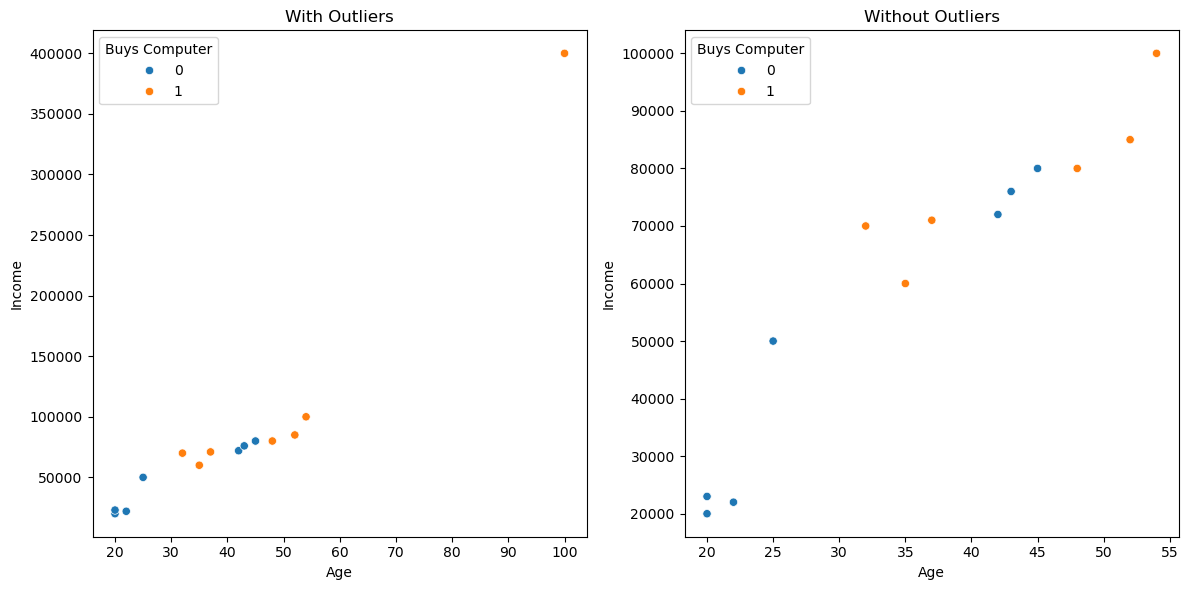

In [19]:
#Write a python program to find out impact analysis on sample data with and without outliers.(Buys Computer Dataset).
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset creation
data = {
    'Age': [25, 35, 45, 20, 22, 54, 32, 42, 37, 43, 52, 48, 20, 100],  # Notice the outlier 100
    'Income': [50000, 60000, 80000, 20000, 22000, 100000, 70000, 72000, 71000, 76000, 85000, 80000, 23000, 400000],  # Notice the outlier 400000
    'Buys Computer': [0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
}
df = pd.DataFrame(data)

# Function to identify and remove outliers using IQR
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Splitting data for analysis
X = df[['Age', 'Income']]
y = df['Buys Computer']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic regression model
model = LogisticRegression()

# Train and evaluate the model with outliers
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_with_outliers = accuracy_score(y_test, y_pred)

# Remove outliers
df_no_outliers = remove_outliers_iqr(df)

# Splitting data without outliers
X_no_outliers = df_no_outliers[['Age', 'Income']]
y_no_outliers = df_no_outliers['Buys Computer']
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.3, random_state=42)

# Train and evaluate the model without outliers
model.fit(X_train_no_outliers, y_train_no_outliers)
y_pred_no_outliers = model.predict(X_test_no_outliers)
accuracy_without_outliers = accuracy_score(y_test_no_outliers, y_pred_no_outliers)

print(f"Accuracy with outliers: {accuracy_with_outliers}")
print(f"Accuracy without outliers: {accuracy_without_outliers}")

# Visualize the data before and after removing outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Income', hue='Buys Computer', data=df)
plt.title('With Outliers')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Income', hue='Buys Computer', data=df_no_outliers)
plt.title('Without Outliers')

plt.tight_layout()
plt.show()


In [21]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [23]:
#Write a python program to perform data integration on sample data sets.

import pandas as pd

# Sample dataset 1 (Customer Information)
data1 = {
    'CustomerID': [1, 2, 3, 4, 5],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 30, 35, 40, 45]
}
df1 = pd.DataFrame(data1)

# Sample dataset 2 (Customer Purchases)
data2 = {
    'CustomerID': [1, 2, 3, 6, 7],
    'Product': ['Laptop', 'Smartphone', 'Tablet', 'Monitor', 'Keyboard'],
    'Amount': [1200, 800, 300, 200, 100]
}
df2 = pd.DataFrame(data2)

# Data integration using merge on 'CustomerID'
integrated_df = pd.merge(df1, df2, on='CustomerID', how='outer')

print("Dataset 1 (Customer Information):")
print(df1)

print("\nDataset 2 (Customer Purchases):")
print(df2)

print("\nIntegrated Dataset:")
print(integrated_df)


Dataset 1 (Customer Information):
   CustomerID     Name  Age
0           1    Alice   25
1           2      Bob   30
2           3  Charlie   35
3           4    David   40
4           5      Eva   45

Dataset 2 (Customer Purchases):
   CustomerID     Product  Amount
0           1      Laptop    1200
1           2  Smartphone     800
2           3      Tablet     300
3           6     Monitor     200
4           7    Keyboard     100

Integrated Dataset:
   CustomerID     Name   Age     Product  Amount
0           1    Alice  25.0      Laptop  1200.0
1           2      Bob  30.0  Smartphone   800.0
2           3  Charlie  35.0      Tablet   300.0
3           4    David  40.0         NaN     NaN
4           5      Eva  45.0         NaN     NaN
5           6      NaN   NaN     Monitor   200.0
6           7      NaN   NaN    Keyboard   100.0
